In [8]:
import glob
import zipfile
import numpy as np
import pandas as pd
from os import path
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D

import scipy.stats as stats
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot

from util import load_zipped_csv_dir

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

<br> L1: Standing still (1 min)              S
<br> L2: Sitting and relaxing (1 min)        S
<br> L3: Lying down (1 min)                  S
<br>
<br> L4: Walking (1 min)                     M 
<br> L5: Climbing stairs (1 min)             M
<br> L9: Cycling (1 min)                     M
<br> L10: Jogging (1 min)                    M
<br> L11: Running (1 min)                    M
<br> L12: Jump front & back (20x)            M
<br>
<br> L6: Waist bends forward (20x)           M
<br> L7: Frontal elevation of arms (20x)     M
<br> L8: Knees bending (crouching) (20x)     M

In [4]:
class Data():
    def __init__(self):
        self.columns = [
            # Chest accelerometer sensor
            'chest_accel_x', 'chest_accel_y', 'chest_accel_z',
    
            # ECG (2 leads)
            'ecg_1', 'ecg_2',

            # Left ankle sensors
            'left_accel_x', 'left_accel_y', 'left_accel_z',
            'left_gyro_x', 'left_gyro_y', 'left_gyro_z',
            'left_mag_x', 'left_mag_y', 'left_mag_z',

            # Right lower arm sensors
            'right_accel_x', 'right_accel_y', 'right_accel_z',
            'right_gyro_x', 'right_gyro_y', 'right_gyro_z',
            'right_mag_x', 'right_mag_y', 'right_mag_z',

            # Activity label
            'activity'
        ]
        self.load_data()
        self.update_labels()
        
    def load_data(self, file_name = 'mhealth.csv'):
        if not path.exists(file_name):
            df = load_zipped_csv_dir('MHEALTHDATASET.zip', prefix = 'mHealth_subject', include_file_column = True, header = None, names = self.columns)
            df.to_csv('mhealth.csv', index = False)
        self.df_0 = pd.read_csv('mhealth.csv')
    
    def view_data(self, n = 5):
        print(self.df.head(n))
        
    def update_labels(self):
        df = self.df_0
        df = df.drop(['file'], axis = 1)
        df = df[df['activity'] != 0]
        df['label'] = np.where(df['activity'].isin([1, 2, 3]), 0, 1)
        df.to_csv('mhealth_s_m.csv', index = False)
        self.df = df
        
    def get_data(self):
        return pd.read_csv('mhealth_s_m.csv')

In [5]:
data = Data()
df = data.get_data()
df

chest_accel_x  chest_accel_y  chest_accel_z     ecg_1     ecg_2  \
0             -9.7788        0.55690        1.19750  0.008373 -0.033490   
1             -9.7733        0.27880        0.73036 -0.025118 -0.025118   
2             -9.8609        0.11561        0.79988  0.025118  0.016745   
3             -9.7409        0.17652        0.88957  0.180010  0.129770   
4             -9.7821        0.21637        0.90368  0.092098  0.046049   
...               ...            ...            ...       ...       ...   
343190        -8.6500       -0.83185       -2.23280  0.288850  0.146520   
343191        -8.9892       -1.04290       -1.67280  0.447930  0.259550   
343192        -9.4536       -1.05650       -1.77930  0.653060  0.376770   
343193       -10.1930       -1.43780       -1.77150  0.715860  0.427000   
343194       -10.1070       -1.72800       -1.95550  0.694920  0.360020   

        left_accel_x  left_accel_y  left_accel_z  left_gyro_x  left_gyro_y  \
0             2.6493       -9.4517      0.376830     -0.20965     -0.88931   
1             2.4157       -9.5306      0.401790     -0.20965     -0.88931   
2             2.3865       -9.5991      0.481410     -0.20037     -0.86867   
3             2.3758       -9.5997      0.429190     -0.20037     -0.86867   
4             2.3239       -9.5406      0.400380     -0.20037     -0.86867   
...              ...           ...           ...          ...          ...   
343190        2.7673       -8.9662      0.412700     -0.44341     -0.57974   
343191        3.1609      -10.0400     -0.074575     -0.44341     -0.57974   
343192        1.9283      -10.0480     -0.889390     -0.44341     -0.57974   
343193        2.4368       -9.8005     -1.830200     -0.44341     -0.57974   
343194        2.8515       -9.4442     -1.849900     -0.45455     -0.58349   

        ...  right_accel_y  right_accel_z  right_gyro_x  right_gyro_y  \
0       ...        -9.0618        1.81770     -0.058824      -0.93429   
1       ...        -9.2048        1.51890     -0.058824      -0.93429   
2       ...        -9.1945        1.55070     -0.058824      -0.93429   
3       ...        -9.1746        1.54130     -0.078431      -0.93429   
4       ...        -9.2039        1.61270     -0.078431      -0.93429   
...     ...            ...            ...           ...           ...   
343190  ...        -7.4942        1.58360     -0.727450      -0.61807   
343191  ...        -8.0277        1.23400     -0.727450      -0.61807   
343192  ...        -8.7792        1.08190     -0.754900      -0.57084   
343193  ...        -9.1622        0.78147     -0.754900      -0.57084   
343194  ...        -9.7806        0.93805     -0.754900      -0.57084   

        right_gyro_z  right_mag_x  right_mag_y  right_mag_z  activity  label  
0           -0.34483     0.355370     -0.37003     -0.35020         1      0  
1           -0.34483     0.719910      0.17803      0.37363         1      0  
2           -0.34483     0.355370     -0.37003     -0.35020         1      0  
3           -0.34052     0.357180     -0.18858     -0.35198         1      0  
4           -0.34052    -0.001887     -0.18867     -0.72017         1      0  
...              ...          ...          ...          ...       ...    ...  
343190      -0.16595    13.300000     19.38600     46.28200         5      1  
343191      -0.16595    12.146000     11.72900     41.64200         5      1  
343192      -0.17888     9.742700      4.79500     35.52600         5      1  
343193      -0.17888     7.355700     -0.51279     28.67200         5      1  
343194      -0.17888     4.074800     -5.44890     21.79700         5      1  

[343195 rows x 25 columns]

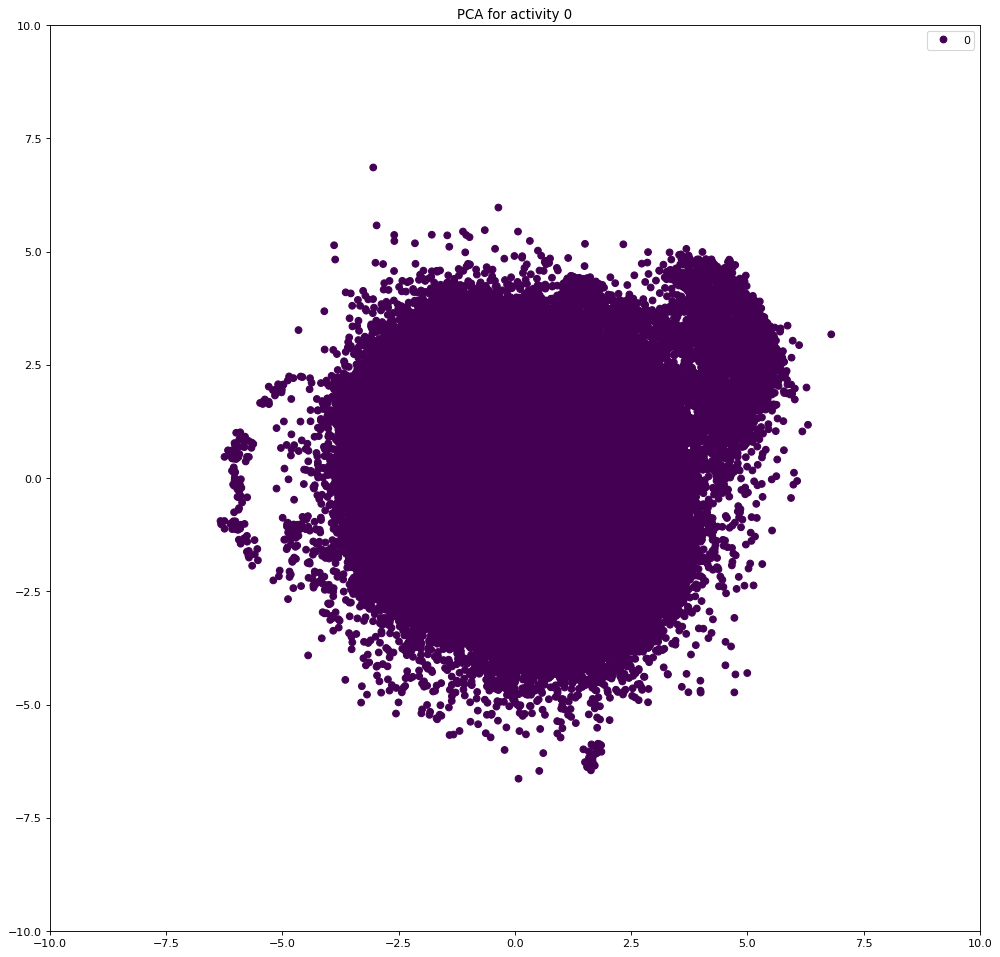

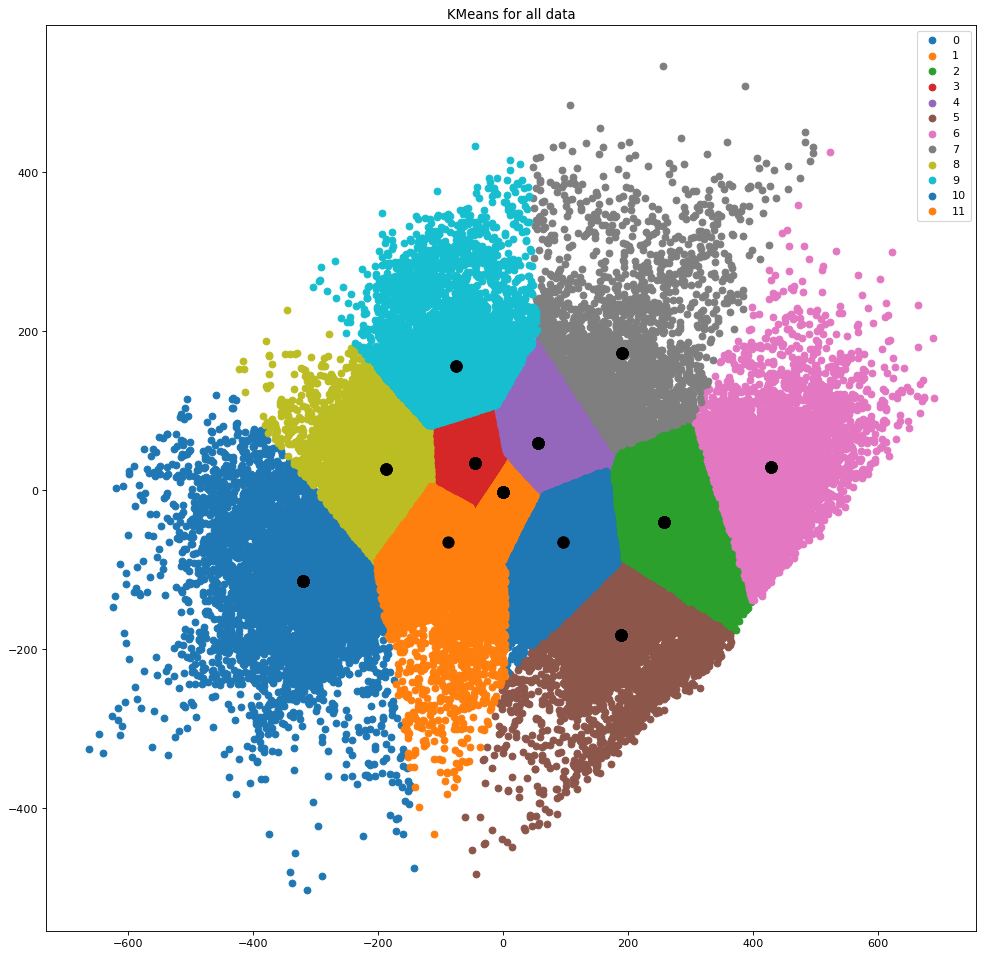

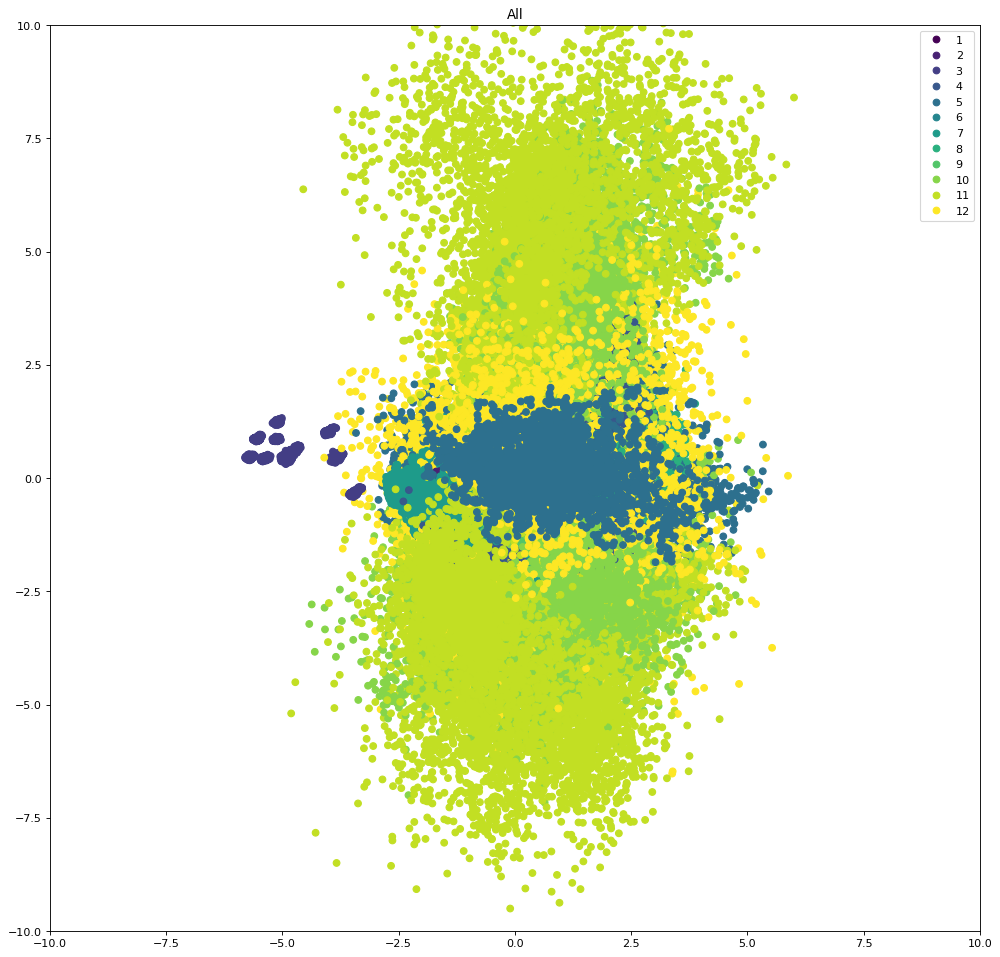

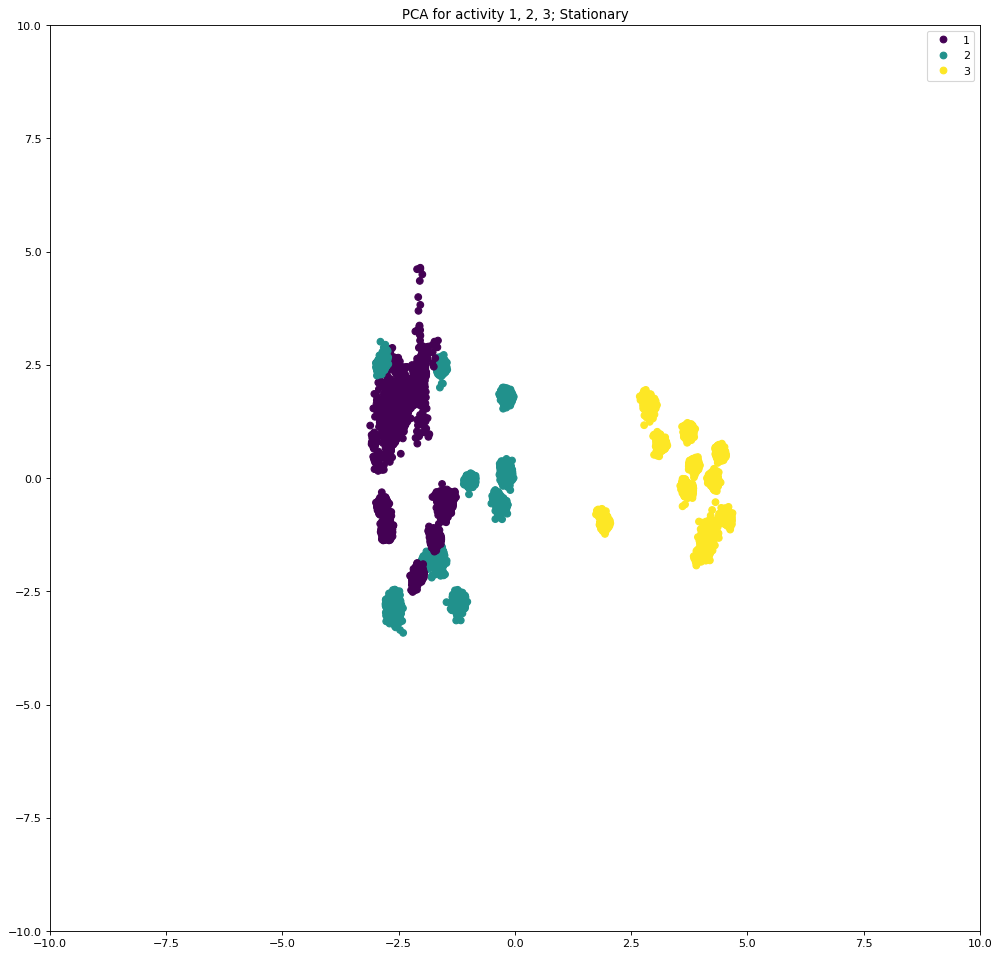

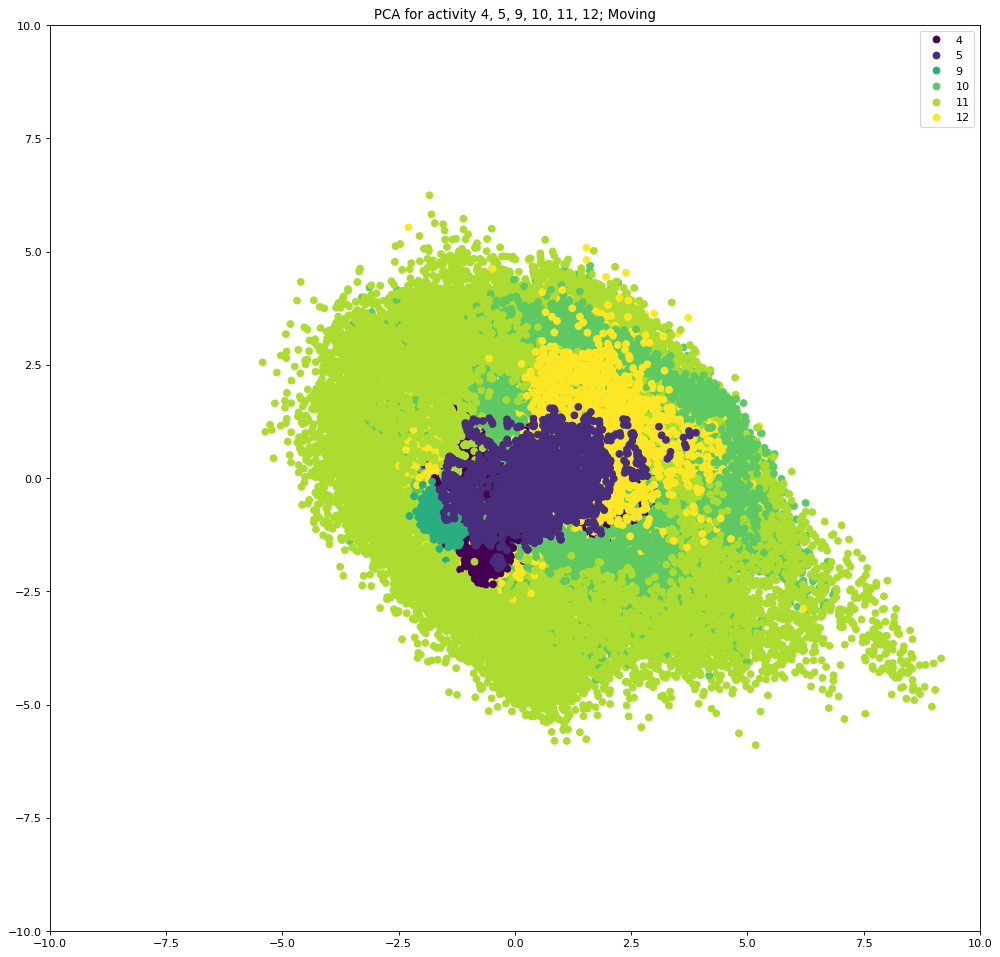

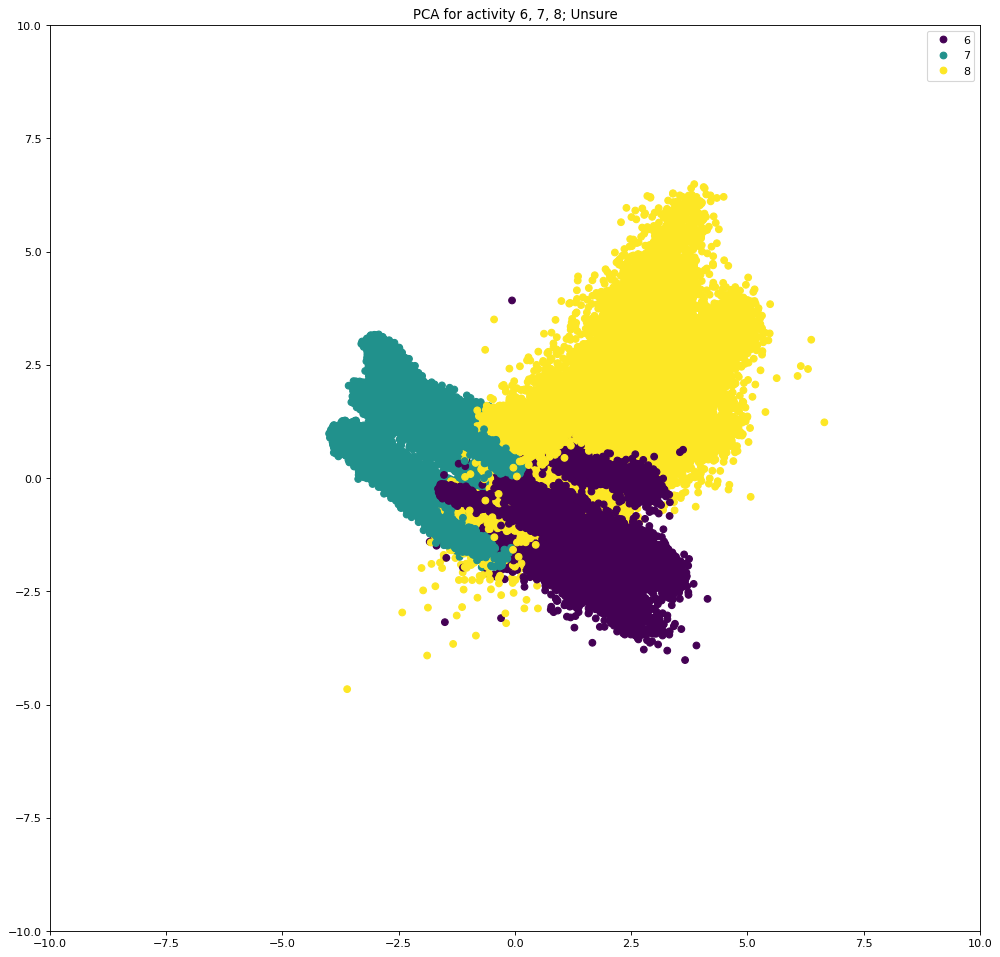

In [4]:
def get_0(df):
    return df[df['activity'] == 0]

def drop_0(df):
    return df[df['activity'] != 0]

def get_1_2_3(df):
    return df.loc[df['activity'].isin([1, 2, 3])]

def get_4_5_9_10_11_12(df):
    return df.loc[df['activity'].isin([4, 5, 9, 10, 11, 12])]

def get_6_7_8(df):
    return df.loc[df['activity'].isin([6, 7, 8])]

def pca(df, title):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X = StandardScaler().fit_transform(X)
#     print(np.mean(df), np.std(df))
    pca = PCA(2)
    X = pca.fit_transform(X)
    figure(figsize = (15, 15), dpi = 80)
    scatter = plt.scatter(X[:,0], X[:,1], c = y)
    labels = np.unique(y)
    handles = [plt.Line2D([],[],marker = 'o', ls = '', color = scatter.cmap(scatter.norm(yi))) for yi in labels]
    plt.legend(handles, labels)
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.title(title)
    plt.show()
    
    
def kmeans(df, title):
    pca = PCA(2)
    df = pca.fit_transform(df)
    kmeans = KMeans(n_clusters = 12)
    label = kmeans.fit_predict(df)
    u_labels = np.unique(label)
    figure(figsize = (15, 15), dpi = 80)
    for i in u_labels:
        plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
    plt.legend()
    plt.title(title)
    plt.show()

def pca_kmeans(df):
    df_0 = get_0(df)
    pca(df_0, 'PCA for activity 0')

    df = drop_0(df)
    kmeans(df, 'KMeans for all data')
    pca(df, 'All')

    df_1_2_3 = get_1_2_3(df)
    df_4_5_9_10_11_12 = get_4_5_9_10_11_12(df)
    df_6_7_8 = get_6_7_8(df)

    pca(df_1_2_3, 'PCA for activity 1, 2, 3; Stationary')
    pca(df_4_5_9_10_11_12, 'PCA for activity 4, 5, 9, 10, 11, 12; Moving')
    pca(df_6_7_8, 'PCA for activity 6, 7, 8; Unsure')

df = pd.read_csv('mhealth.csv')
df = df.drop(['file'], axis = 1)
pca_kmeans(df)

In [28]:
class EDA():
    def __init__(self):
        self.count = {
            1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0
        }
        self.subject = {
            1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None
        }
        self.features = [
            # Chest accelerometer sensor
            'chest_accel_x', 'chest_accel_y', 'chest_accel_z',
    
            # ECG (2 leads)
            'ecg_1', 'ecg_2',

            # Left ankle sensors
            'left_accel_x', 'left_accel_y', 'left_accel_z',
            'left_gyro_x', 'left_gyro_y', 'left_gyro_z',
            'left_mag_x', 'left_mag_y', 'left_mag_z',

            # Right lower arm sensors
            'right_accel_x', 'right_accel_y', 'right_accel_z',
            'right_gyro_x', 'right_gyro_y', 'right_gyro_z',
            'right_mag_x', 'right_mag_y', 'right_mag_z',
        ]
        self.color = ['blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
        self.sensor_data = {'chest': [], 
                            'ecg': [], 
                            'left_accel': [], 'left_gyro': [], 'left_mag': [], 
                            'right_accel':[], 'right_gyro':[], 'right_mag':[]
                      }
        self.df_0 = pd.read_csv('mhealth.csv')
        self.df = pd.read_csv('mhealth_s_m.csv')
        
        self.class_count(self.df, self.df_0)
        self.activity_count(self.df_0)
        self.activity_count_subject(self.df_0)
        self.sensor_data_plot(self.df, self.df_0)
        self.box_plot(self.df)
        self.feature_importance(self.df)
        self.TSNE(self.df)
    
    '''
    This function shows the count of all the activites categorized into stationary or movement. 
    Blue is for Stationary, Red is for Movement 
    '''
    def class_count(self, df, df_0):
        count = dict(df['label'].value_counts().sort_index())
        count_0 = dict(df_0['activity'].value_counts().sort_index())
        print('Count', count, 'Inbalance:', round(count[1] / count[0], 2))
        plt.figure(figsize = (10, 7), dpi = 80)
        plt.bar([0], count[0], color = 'blue', label = 'Stationary')
        plt.bar([1], count[1], color = 'red', label = 'Movement')
        plt.bar([2], count_0[0], color = 'black', label = 'Unknown')
        plt.legend()
        plt.xticks([0, 1, 2], ['Stationary', 'Movement', 'Unknown'], rotation = 90)
        plt.xlabel('Movement Type')
        plt.ylabel('Count')
        plt.title('Movement Type and Unknown Count for full dataset')
        plt.show()
    the
    '''
    Util function for activity_count and activity_count_subject
    '''
    def _util_count(self, df):
        count = dict(df['activity'].value_counts().sort_index())
        del count[0]
        return dict(list(count.items())[:3]), dict(list(count.items())[3:])
    
    '''
    This function shows the count of all the activites. 
    Blue is for Stationary, Red is for Movement 
    '''
    def activity_count(self, df):
        s, m = self._util_count(df)
        plt.figure(figsize = (10, 7), dpi = 80)
        plt.bar(s.keys(), s.values(), color = 'blue', label = 'Stationary')
        plt.bar(m.keys(), m.values(), color = 'red', label = 'Movement')
        plt.legend()
        plt.xlabel('Activity')
        plt.ylabel('Count')
        plt.title('Activity Count for full dataset')
        plt.show()
        
    '''
    This function shows the count of all the activites for each subject. 
    Blue is for Stationary, Red is for Movement 
    ''' 
    def activity_count_subject(self, df, return_plt = True): 
        print('Activity Count for each subject')
        fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (10, 10)) 
        fig.tight_layout()
        for subject in self.subject:
            sub_df = df.loc[df['file'] == 'MHEALTHDATASET/mHealth_subject' + str(subject) + '.log']
            s, m = self._util_count(sub_df)
            axes[(subject - 1) % 5, (subject - 1) % 2].bar(s.keys(), s.values(), color = 'blue', label = 'Stationary')
            axes[(subject - 1) % 5, (subject - 1) % 2].bar(m.keys(), m.values(), color = 'red', label = 'Movement')
            axes[(subject - 1) % 5, (subject - 1) % 2].set_title('Subject ' + str(subject))
        plt.legend()
        plt.show()
    
    '''
    Util function for sensor_data_plot
    '''
    def _util_sensor(self, df):
        sensor_data = self.sensor_data.copy()
        sensor_data['chest'] = [df['chest_accel_x'].tolist(), df['chest_accel_y'].tolist(), df['chest_accel_z'].tolist()]
        sensor_data['ecg'] = [df['ecg_1'].tolist(), df['ecg_2'].tolist()]
        
        sensor_data['left_accel'] = [df['left_accel_x'].tolist(), df['left_accel_y'].tolist(), df['left_accel_z'].tolist()]
        sensor_data['left_gyro'] = [df['left_gyro_x'].tolist(), df['left_gyro_y'].tolist(), df['left_gyro_z'].tolist()]
        sensor_data['left_mag'] = [df['left_mag_x'].tolist(), df['left_mag_y'].tolist(), df['left_mag_z'].tolist()]
        
        sensor_data['right_accel'] = [df['right_accel_x'].tolist(), df['right_accel_y'].tolist(), df['right_accel_z'].tolist()]
        sensor_data['right_gyro'] = [df['right_gyro_x'].tolist(), df['right_gyro_y'].tolist(), df['right_gyro_z'].tolist()]
        sensor_data['right_mag'] = [df['right_mag_x'].tolist(), df['right_mag_y'].tolist(), df['right_mag_z'].tolist()]
        return sensor_data
    
    '''
    This function plots the different sensor data for each activity. 
    Blue is for Stationary, Red is for Movement 
    ''' 
    def sensor_data_plot(self, df, df_0):
        print('Different Sensor Data')
        for i in range(0, 13):
            if (i == 0):
                print('Unknown class 0')
                color = 'black'
                df = df_0
            else:
                print('Activity:', i, 'Stationary' if i <= 3 else 'Movement')
                color = 'blue' if i <= 3 else 'red'
                df = df
            sub_df = df.loc[df['activity'] == i]
            sensor_data = self._util_sensor(sub_df)
            fig = plt.figure(figsize = (20, 10))
            fig.tight_layout()
            

            ax = fig.add_subplot(2, 4, 1, projection = '3d')
            ax.scatter(sensor_data['chest'][0], sensor_data['chest'][1], sensor_data['chest'][2], c = color)
            ax.set_title('Chest')
            
            ax = fig.add_subplot(2, 4, 2)
            ax.scatter(sensor_data['ecg'][0], sensor_data['ecg'][1], c = color)
            ax.set_title('ECG')
            
            ax = fig.add_subplot(2, 4, 3, projection = '3d')
            ax.scatter(sensor_data['left_accel'][0], sensor_data['left_accel'][1], sensor_data['left_accel'][2], c = color)
            ax.set_title('left accel')
            
            ax = fig.add_subplot(2, 4, 4, projection = '3d')
            ax.scatter(sensor_data['left_gyro'][0], sensor_data['left_gyro'][1], sensor_data['left_gyro'][2], c = color)
            ax.set_title('left gyro')
            
            ax = fig.add_subplot(2, 4, 5, projection = '3d')
            ax.scatter(sensor_data['left_mag'][0], sensor_data['left_mag'][1], sensor_data['left_mag'][2], c = color)
            ax.set_title('left mag')
            
            ax = fig.add_subplot(2, 4, 6, projection = '3d')
            ax.scatter(sensor_data['right_accel'][0], sensor_data['right_accel'][1], sensor_data['right_accel'][2], c = color)
            ax.set_title('right accel')

            ax = fig.add_subplot(2, 4, 7, projection = '3d')
            ax.scatter(sensor_data['right_gyro'][0], sensor_data['right_gyro'][1], sensor_data['right_gyro'][2], c = color)
            ax.set_title('right gyro')

            ax = fig.add_subplot(2, 4, 8, projection = '3d')
            ax.scatter(sensor_data['right_mag'][0], sensor_data['right_mag'][1], sensor_data['right_mag'][2], c = color)
            ax.set_title('right mag')
            plt.show()
    
    
        
    '''
    This function checks for outliers for each sensor for all the activities
    ''' 
    def box_plot(self, df):
        print('Outliers')
        for feature in self.features:
            temp = dict()
            for i in range(1, 13):
                temp[i] = df.loc[df['activity'] == i, feature]
            df_temp = pd.DataFrame(temp)
            df_temp.boxplot().set_title(feature)
            plt.show()
    
    '''
    This function shows the feature importance for each activity and each label.
    ''' 
    def feature_importance(self, df):
        print('Feature Importance')
        model = LogisticRegression(max_iter = 1000) 
        X = df[self.features]
        y_activity = df['activity']
        y_label = df['label']
        
        model.fit(X, y_activity)
        importance = model.coef_[0]
        plt.figure(figsize = (10, 7), dpi = 80)
        plt.bar([x for x in self.features], abs(importance))
        plt.xticks(rotation = 90)
        plt.title('Feature Importance per activity')
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.show()
        
        model.fit(X, y_label)
        importance = model.coef_[0]
        plt.figure(figsize = (10, 7), dpi = 80)
        plt.bar([x for x in self.features], abs(importance))
        plt.xticks(rotation = 90)
        plt.title('Feature Importance per label')
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.show()
    
    '''
    This function shows the TSNE for all the activities and labels. 
    Activity and labels are defined in the ledgend 
    ''' 
    def TSNE(self, df):
        print('TSNE')
        edaX = df.drop(['activity', 'label'], axis = 1)
        tsne = TSNE(init = 'pca', verbose = 1, perplexity = 50, n_jobs = -1).fit_transform(edaX)
        sb.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = df['activity'])
        plt.title('t-SNE of each activity')
        plt.show()
        sb.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = df['label'])
        plt.title('t-SNE of each label')
        plt.show()

Count {0: 92160, 1: 251035} Inbalance: 2.72


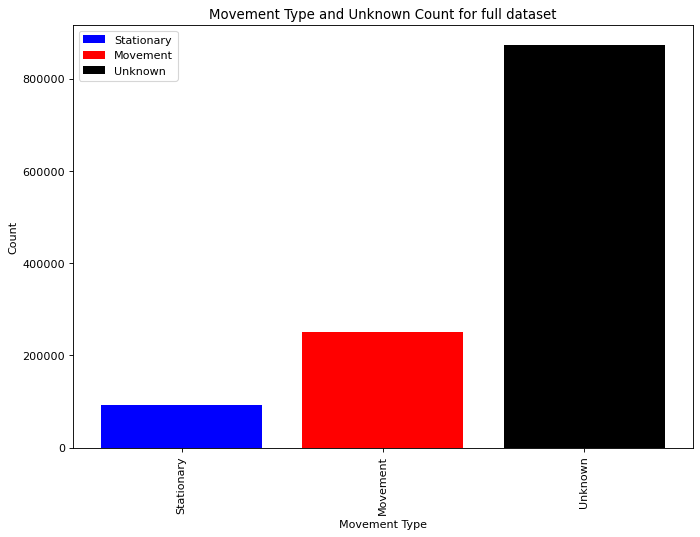

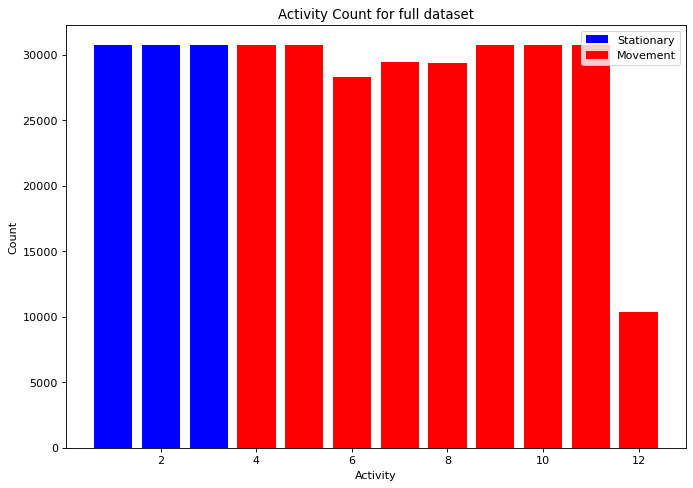

Activity Count for each subject


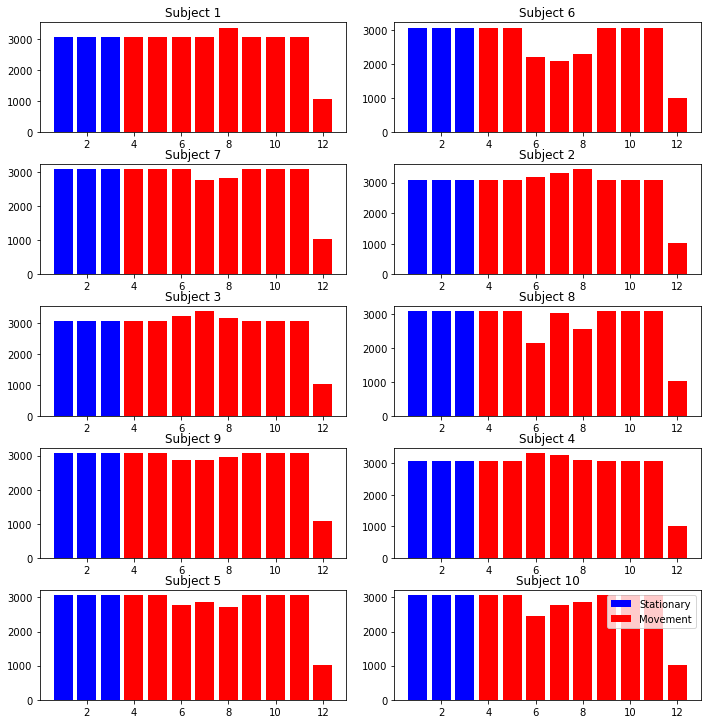

Different Sensor Data
Unknown class 0


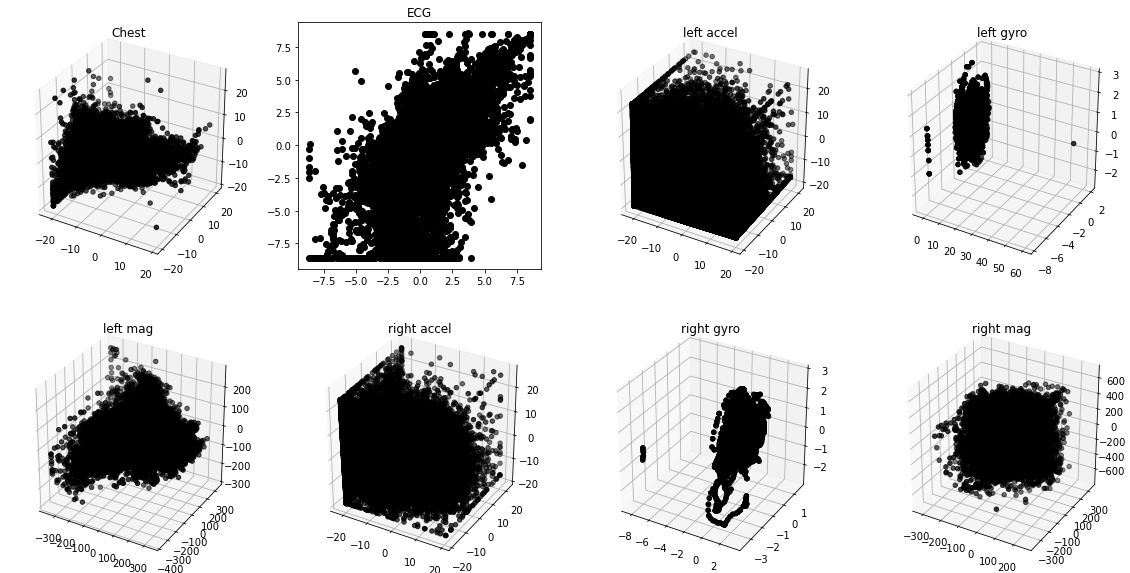

Activity: 1 Stationary


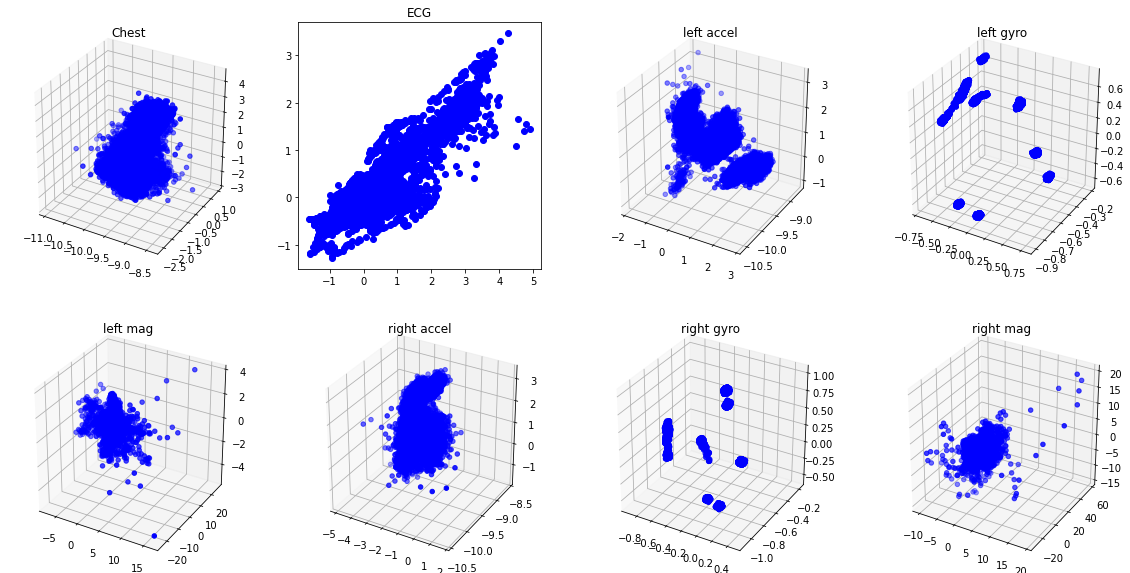

Activity: 2 Stationary


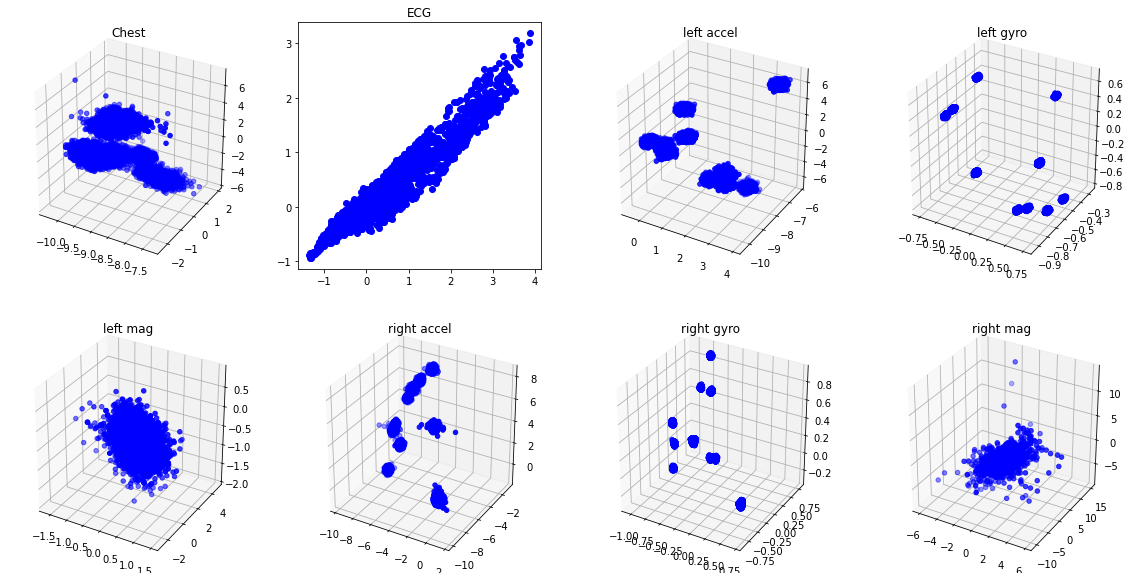

Activity: 3 Stationary


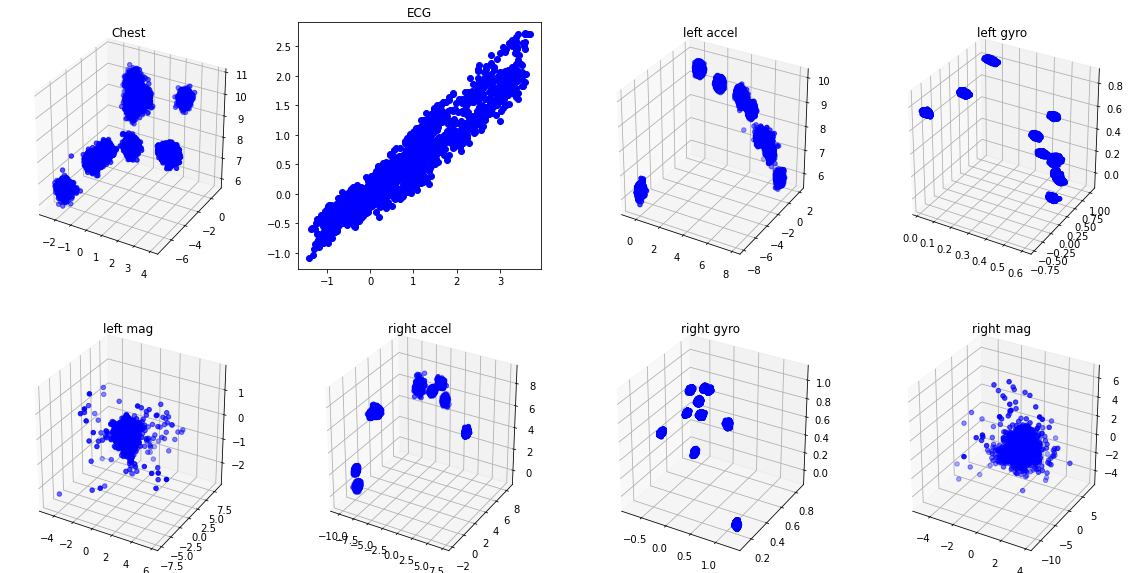

Activity: 4 Movement


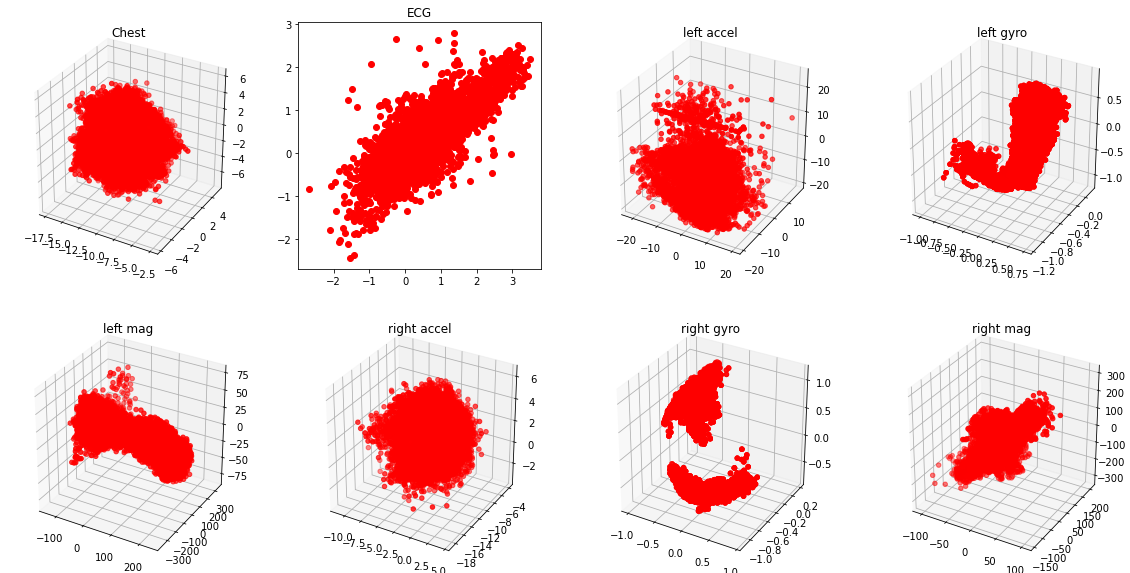

Activity: 5 Movement


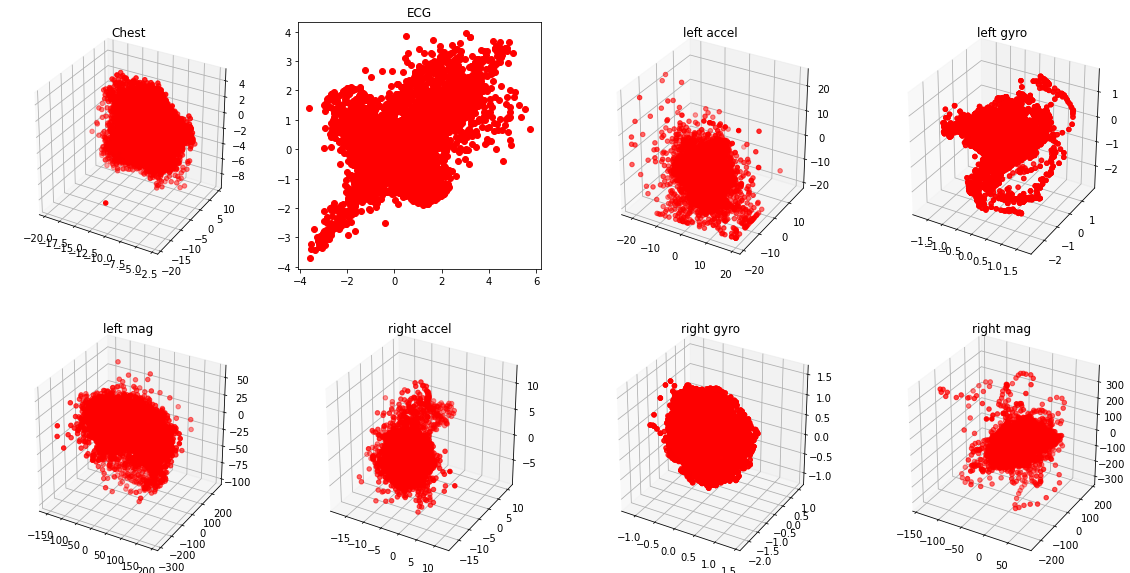

Activity: 6 Movement


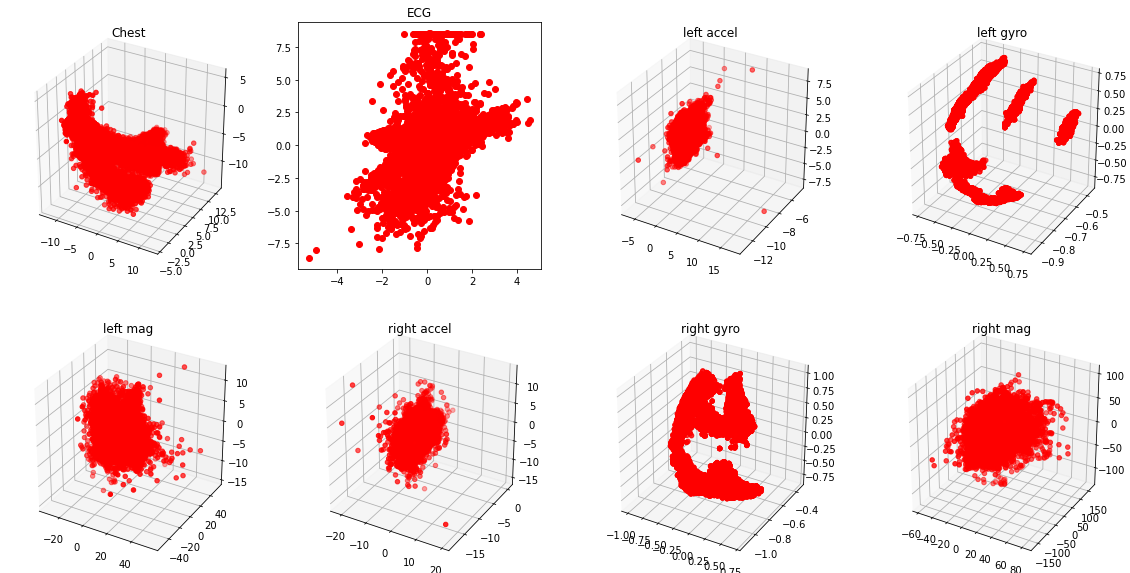

Activity: 7 Movement


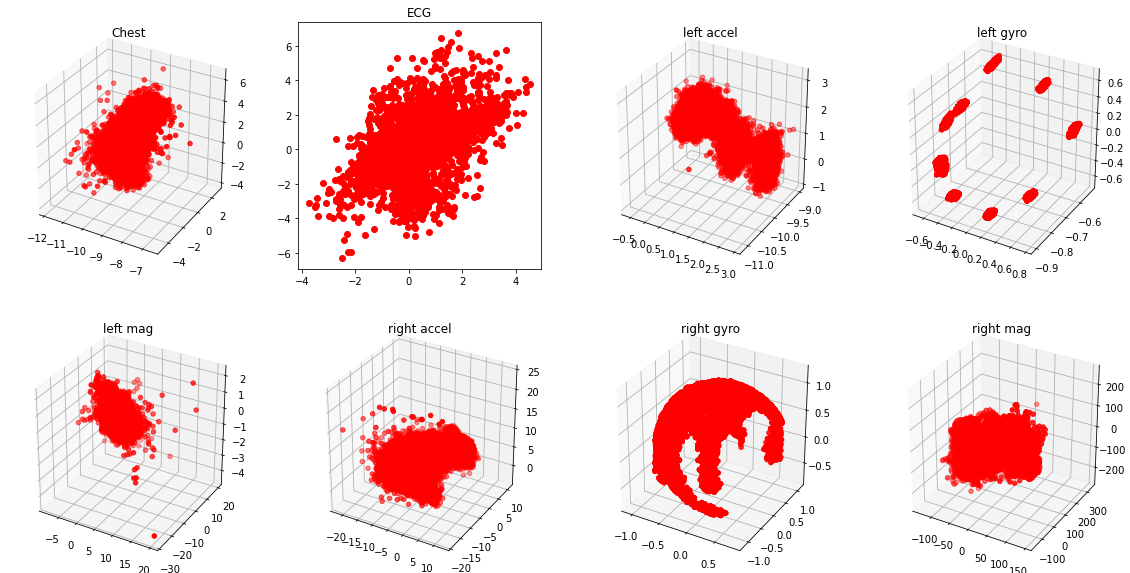

Activity: 8 Movement


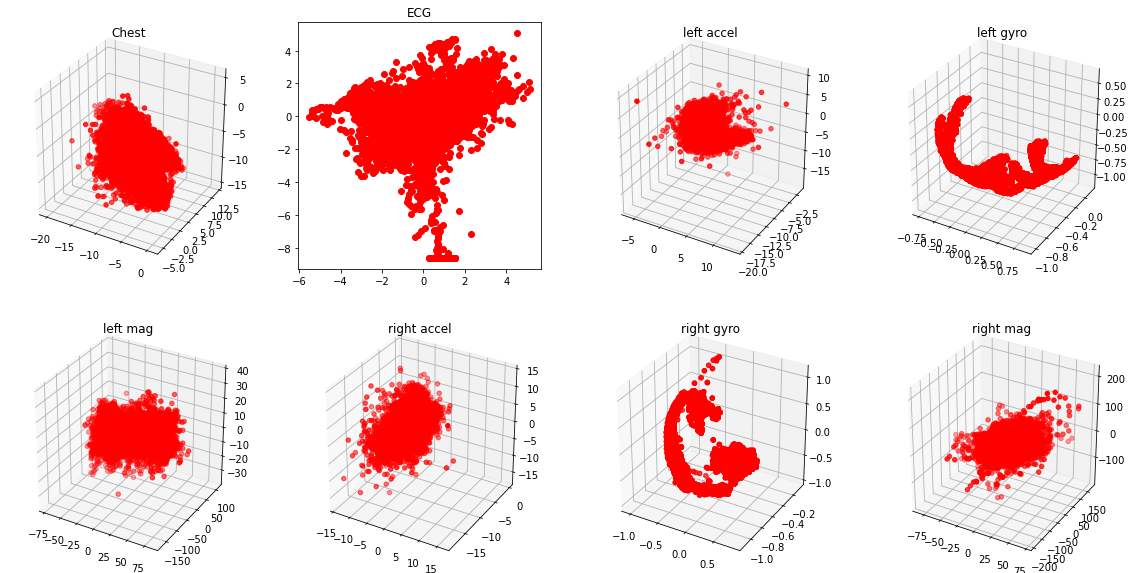

Activity: 9 Movement


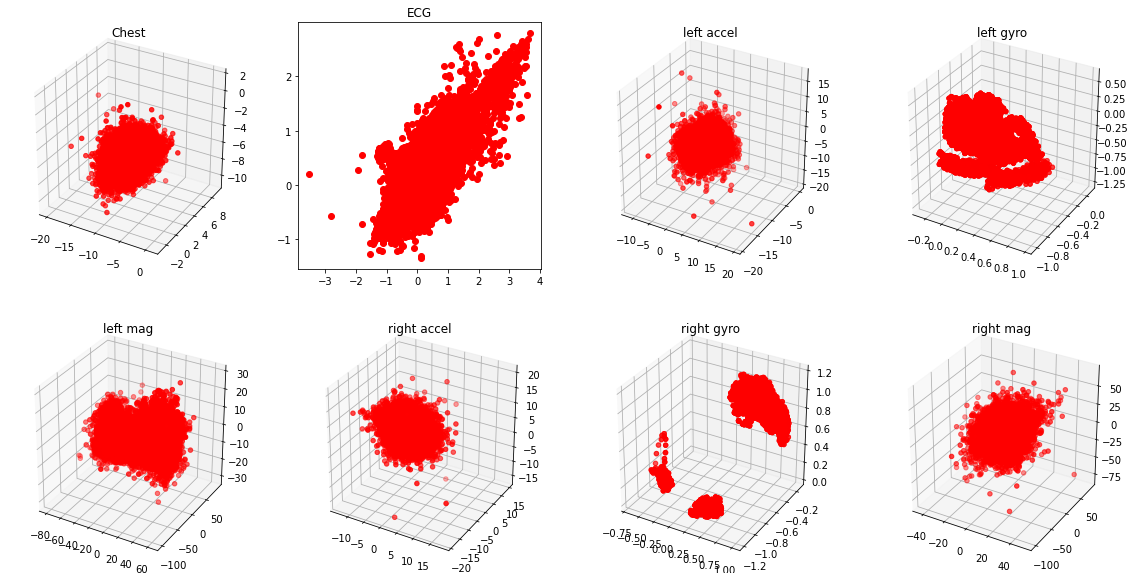

Activity: 10 Movement


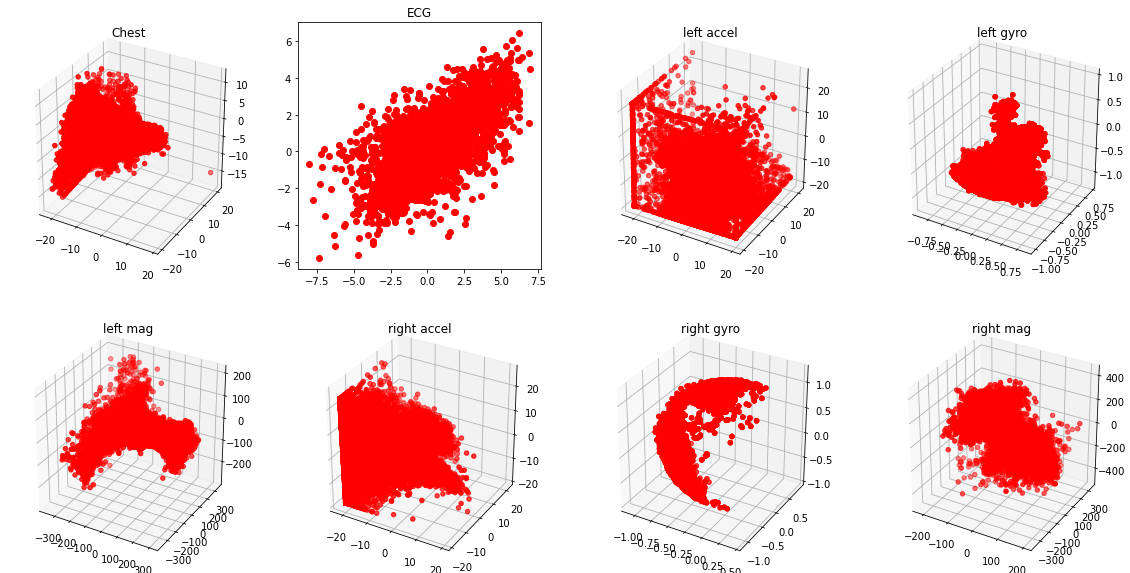

Activity: 11 Movement


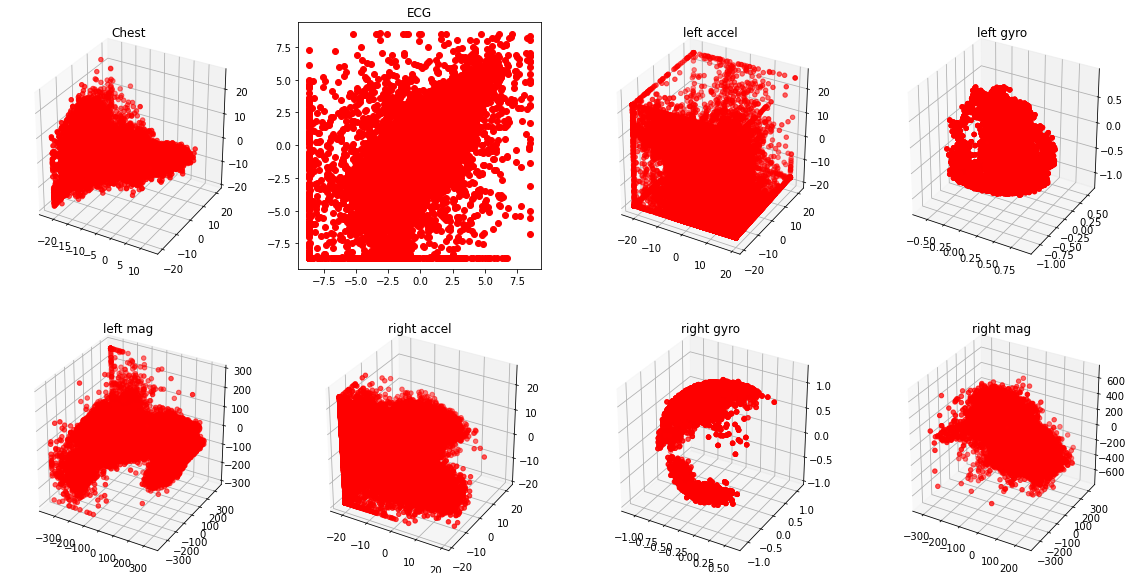

Activity: 12 Movement


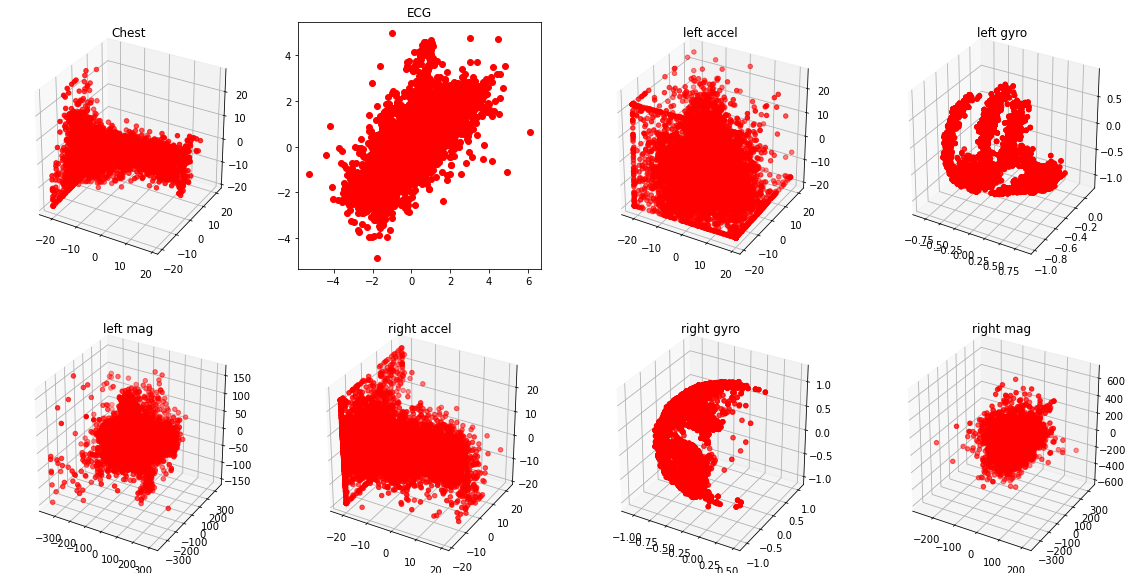

Outliers


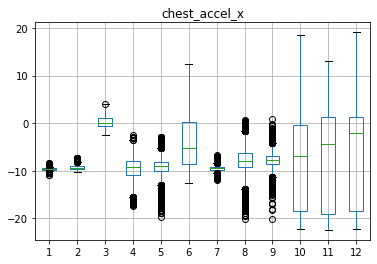

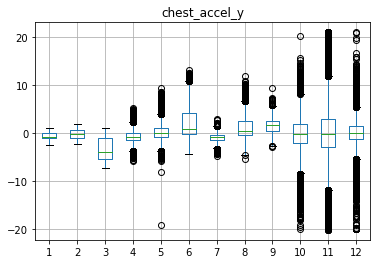

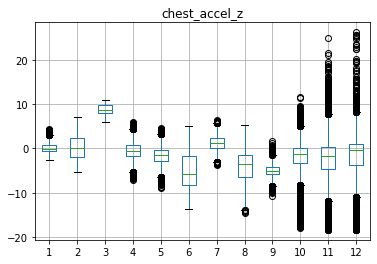

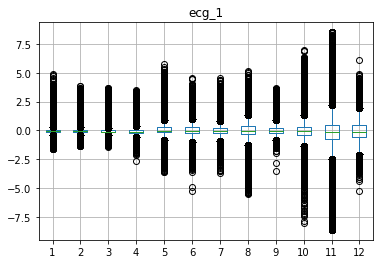

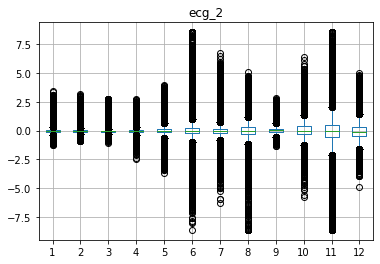

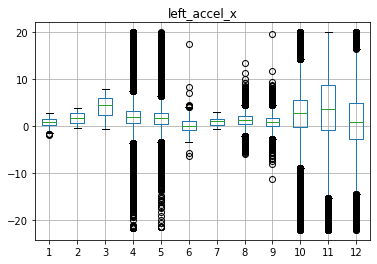

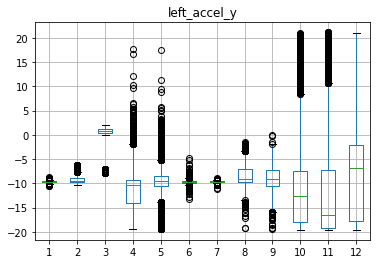

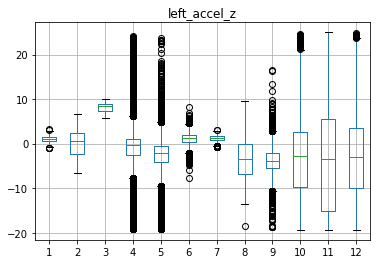

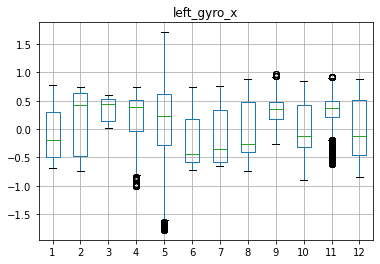

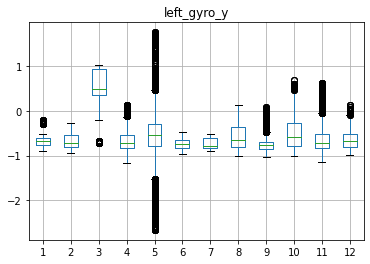

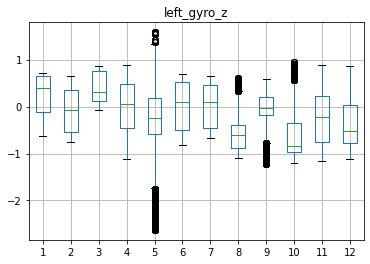

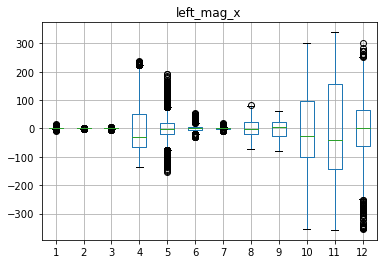

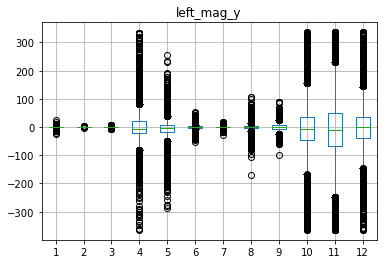

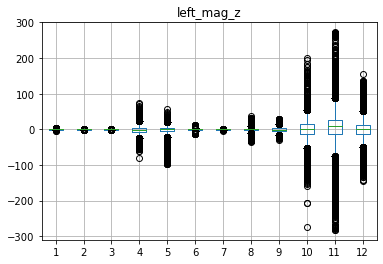

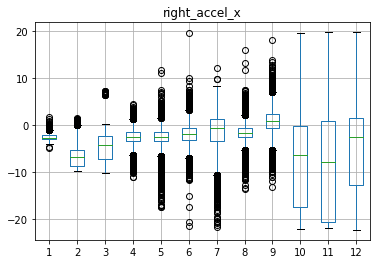

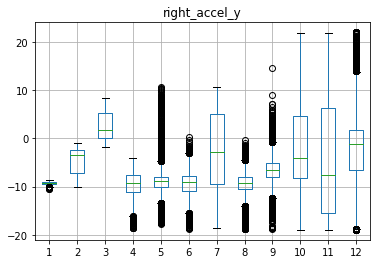

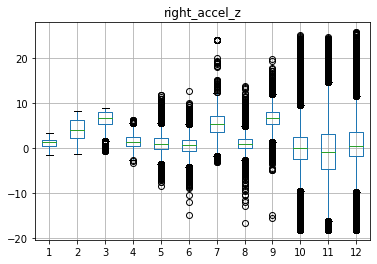

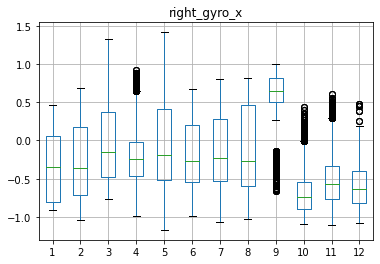

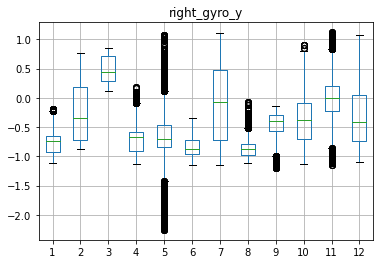

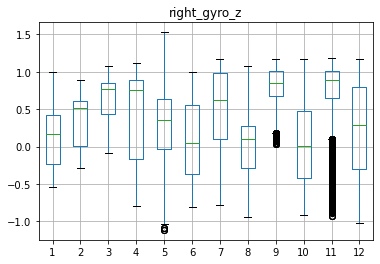

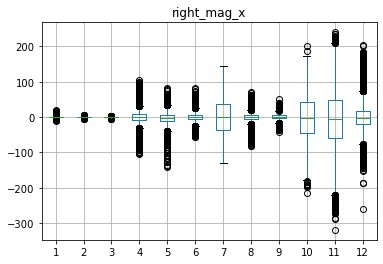

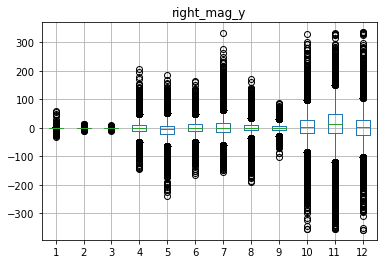

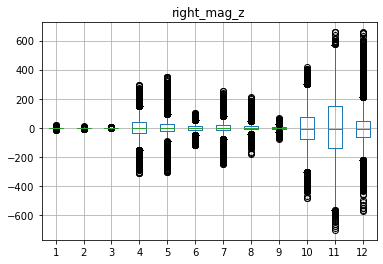

Feature Importance


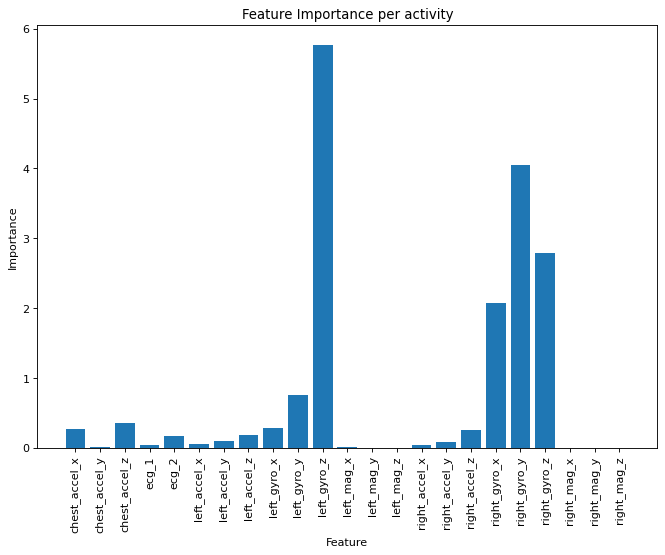

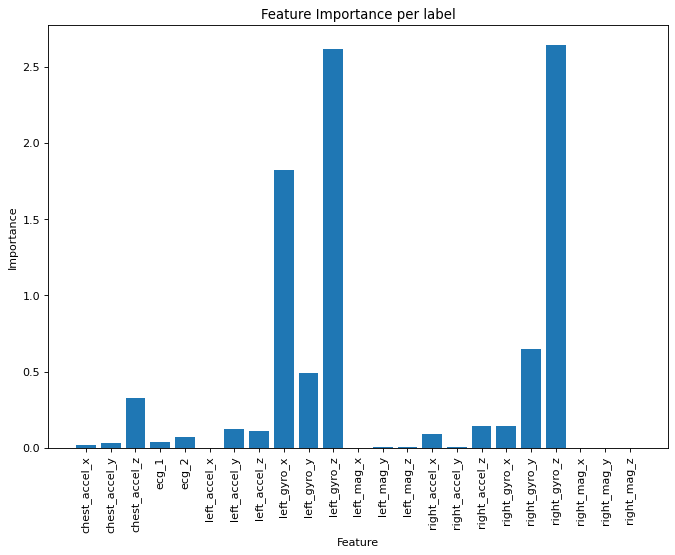

TSNE
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 343195 samples in 0.002s...
[t-SNE] Computed neighbors for 343195 samples in 1089.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 343195
[t-SNE] Computed conditional probabilities for sample 2000 / 343195
[t-SNE] Computed conditional probabilities for sample 3000 / 343195
[t-SNE] Computed conditional probabilities for sample 4000 / 343195
[t-SNE] Computed conditional probabilities for sample 5000 / 343195
[t-SNE] Computed conditional probabilities for sample 6000 / 343195
[t-SNE] Computed conditional probabilities for sample 7000 / 343195
[t-SNE] Computed conditional probabilities for sample 8000 / 343195
[t-SNE] Computed conditional probabilities for sample 9000 / 343195
[t-SNE] Computed conditional probabilities for sample 10000 / 343195
[t-SNE] Computed conditional probabilities for sample 11000 / 343195
[t-SNE] Computed conditional probabilities for sample 12000 / 343195
[t-SNE] Computed conditiona

[t-SNE] Computed conditional probabilities for sample 132000 / 343195
[t-SNE] Computed conditional probabilities for sample 133000 / 343195
[t-SNE] Computed conditional probabilities for sample 134000 / 343195
[t-SNE] Computed conditional probabilities for sample 135000 / 343195
[t-SNE] Computed conditional probabilities for sample 136000 / 343195
[t-SNE] Computed conditional probabilities for sample 137000 / 343195
[t-SNE] Computed conditional probabilities for sample 138000 / 343195
[t-SNE] Computed conditional probabilities for sample 139000 / 343195
[t-SNE] Computed conditional probabilities for sample 140000 / 343195
[t-SNE] Computed conditional probabilities for sample 141000 / 343195
[t-SNE] Computed conditional probabilities for sample 142000 / 343195
[t-SNE] Computed conditional probabilities for sample 143000 / 343195
[t-SNE] Computed conditional probabilities for sample 144000 / 343195
[t-SNE] Computed conditional probabilities for sample 145000 / 343195
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 252000 / 343195
[t-SNE] Computed conditional probabilities for sample 253000 / 343195
[t-SNE] Computed conditional probabilities for sample 254000 / 343195
[t-SNE] Computed conditional probabilities for sample 255000 / 343195
[t-SNE] Computed conditional probabilities for sample 256000 / 343195
[t-SNE] Computed conditional probabilities for sample 257000 / 343195
[t-SNE] Computed conditional probabilities for sample 258000 / 343195
[t-SNE] Computed conditional probabilities for sample 259000 / 343195
[t-SNE] Computed conditional probabilities for sample 260000 / 343195
[t-SNE] Computed conditional probabilities for sample 261000 / 343195
[t-SNE] Computed conditional probabilities for sample 262000 / 343195
[t-SNE] Computed conditional probabilities for sample 263000 / 343195
[t-SNE] Computed conditional probabilities for sample 264000 / 343195
[t-SNE] Computed conditional probabilities for sample 265000 / 343195
[t-SNE] Computed con

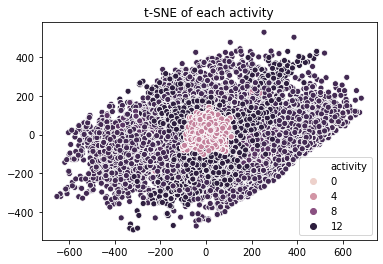

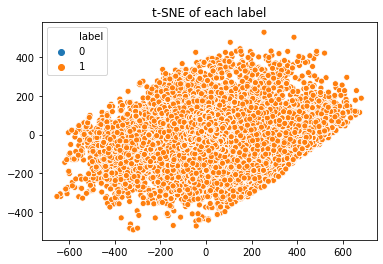

In [29]:
EDA()

Normality Tests


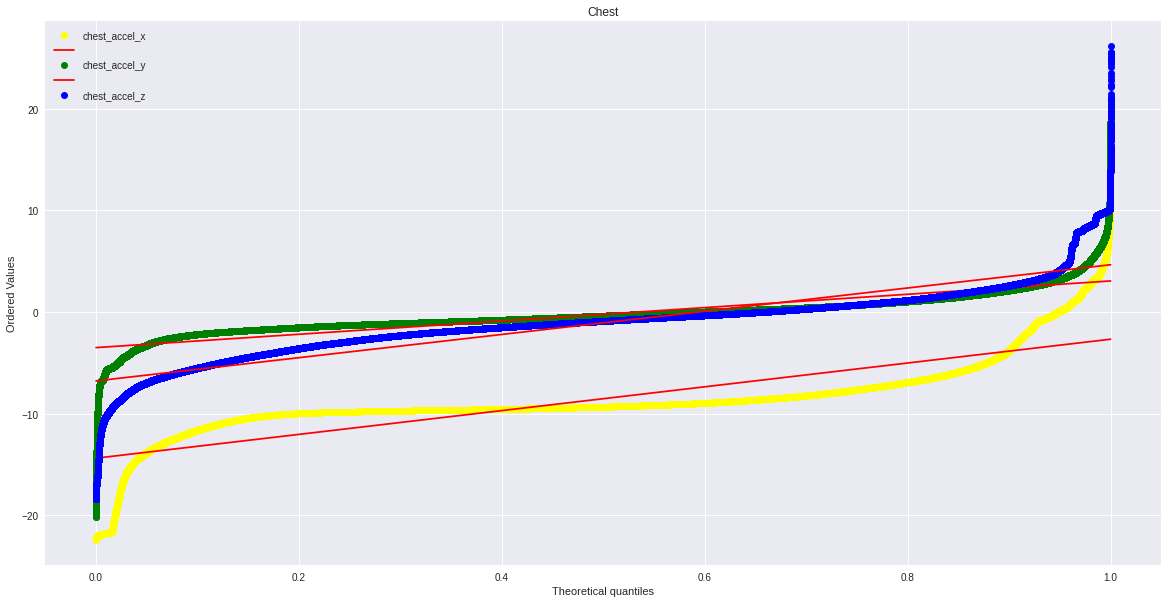

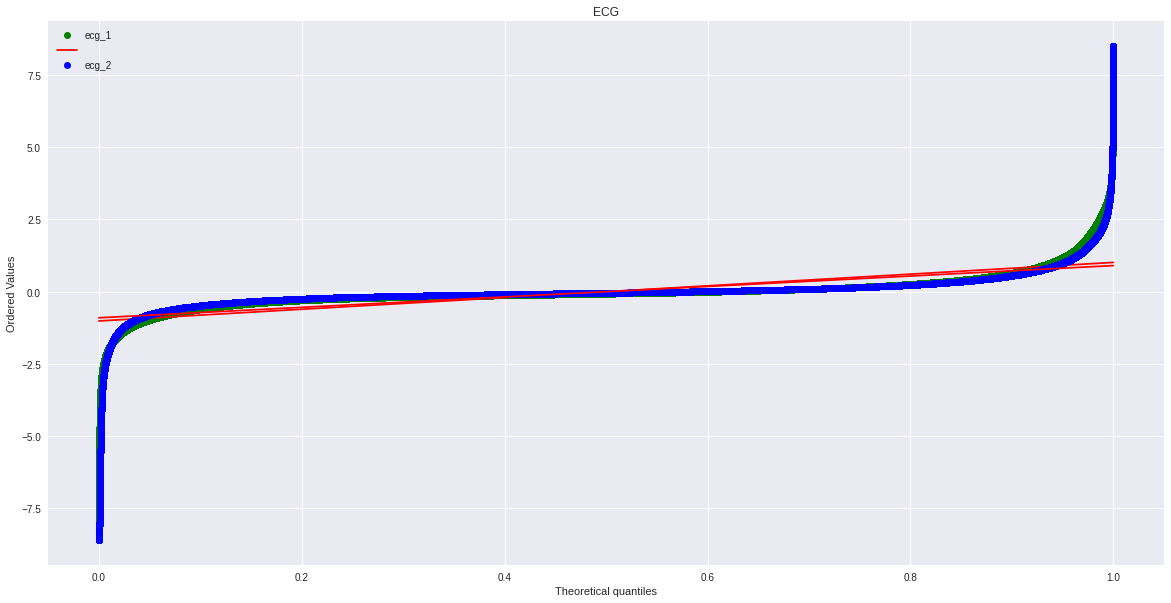

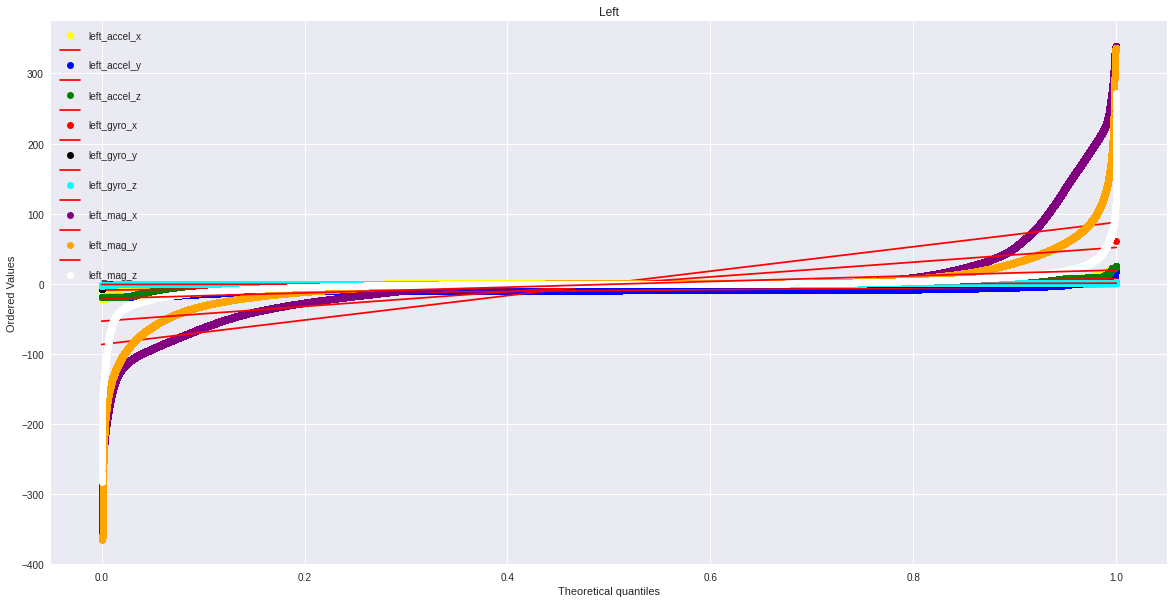

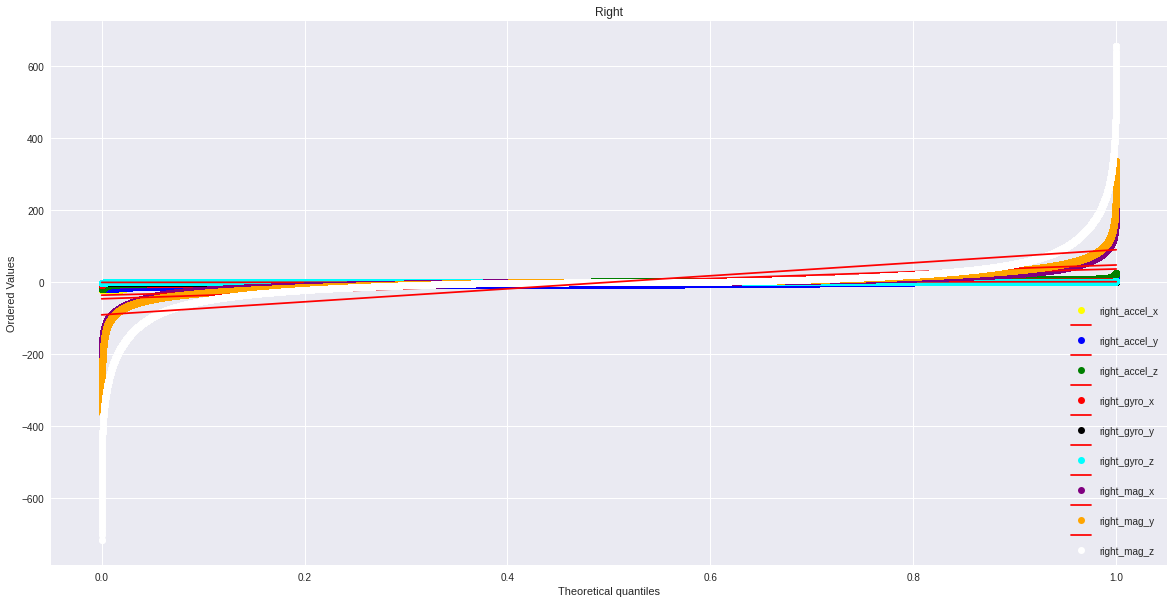

In [8]:
'''
This function checks for normality 
''' 
def normality_test(df):
    print('Normality Tests')
    plt.style.use('seaborn')
    fig, ax = plt.subplots(1, 1, figsize = (20, 10))
    stats.probplot(df['chest_accel_x'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['chest_accel_y'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['chest_accel_z'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    ax.get_lines()[0].set_markerfacecolor('yellow')
    ax.get_lines()[1].set_markerfacecolor('blue')
    ax.get_lines()[2].set_markerfacecolor('green')
    ax.set_title('Chest')
    ax.legend(['chest_accel_x', '', 'chest_accel_y', '', 'chest_accel_z'])

    fig, ax = plt.subplots(1, 1, figsize = (20, 10))
    plt.style.use('seaborn')
    stats.probplot(df['ecg_1'], dist = stats.beta, sparams = (1, 1), plot = plt, fit = False)
    stats.probplot(df['ecg_2'], dist = stats.beta, sparams = (1, 1), plot = plt, fit = False)
    ax.get_lines()[0].set_markerfacecolor('green')
    ax.get_lines()[1].set_markerfacecolor('blue')
    ax.set_title('ECG')
    ax.legend(['ecg_1', '', 'ecg_2'])

    fig, ax = plt.subplots(1, 1, figsize = (20, 10))
    stats.probplot(df['left_accel_x'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['left_accel_y'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['left_accel_z'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['left_gyro_x'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['left_gyro_y'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['left_gyro_z'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['left_mag_x'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['left_mag_y'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['left_mag_z'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    ax.get_lines()[0].set_markerfacecolor('yellow')
    ax.get_lines()[2].set_markerfacecolor('blue')
    ax.get_lines()[4].set_markerfacecolor('green')
    ax.get_lines()[6].set_markerfacecolor('red')
    ax.get_lines()[8].set_markerfacecolor('black')
    ax.get_lines()[10].set_markerfacecolor('cyan')
    ax.get_lines()[12].set_markerfacecolor('purple')
    ax.get_lines()[14].set_markerfacecolor('orange')
    ax.get_lines()[16].set_markerfacecolor('white')
    ax.set_title('Left')
    ax.legend(['left_accel_x', '', 'left_accel_y', '', 'left_accel_z', '',
               'left_gyro_x', '', 'left_gyro_y', '', 'left_gyro_z', '',
               'left_mag_x', '', 'left_mag_y', '', 'left_mag_z'])

    fig, ax = plt.subplots(1, 1, figsize = (20, 10))
    stats.probplot(df['right_accel_x'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['right_accel_y'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['right_accel_z'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['right_gyro_x'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['right_gyro_y'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['right_gyro_z'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['right_mag_x'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['right_mag_y'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    stats.probplot(df['right_mag_z'], dist = stats.beta, sparams = (1, 1), plot = ax, fit = False)
    ax.get_lines()[0].set_markerfacecolor('yellow')
    ax.get_lines()[2].set_markerfacecolor('blue')
    ax.get_lines()[4].set_markerfacecolor('green')
    ax.get_lines()[6].set_markerfacecolor('red')
    ax.get_lines()[8].set_markerfacecolor('black')
    ax.get_lines()[10].set_markerfacecolor('cyan')
    ax.get_lines()[12].set_markerfacecolor('purple')
    ax.get_lines()[14].set_markerfacecolor('orange')
    ax.get_lines()[16].set_markerfacecolor('white')
    ax.set_title('Right')
    ax.legend(['right_accel_x', '', 'right_accel_y', '', 'right_accel_z', '',
               'right_gyro_x', '', 'right_gyro_y', '', 'right_gyro_z', '',
               'right_mag_x', '', 'right_mag_y', '', 'right_mag_z'])
normality_test(df)